In [1]:
import torch
import random
import torch.nn as nn
import torch.nn.functional as F
import networkx as nx
import torch_geometric as torch_geometric
import math

import torch_geometric.nn as pyg_nn
import torch_geometric.utils as pyg_utils

import time
from datetime import datetime

import networkx as nx
import numpy as np
import torch
import torch.optim as optim
import numpy as np

from torch_geometric.datasets import TUDataset
from torch_geometric.datasets import Planetoid
from torch_geometric.data import Data, DataLoader

import torch_geometric.transforms as T

#from tensorboardX import SummaryWriter
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from torch_geometric.nn import GCNConv,GINConv
from torch.distributions import Bernoulli,Categorical
import matplotlib.cm as cmx

In [2]:
dataset=[]

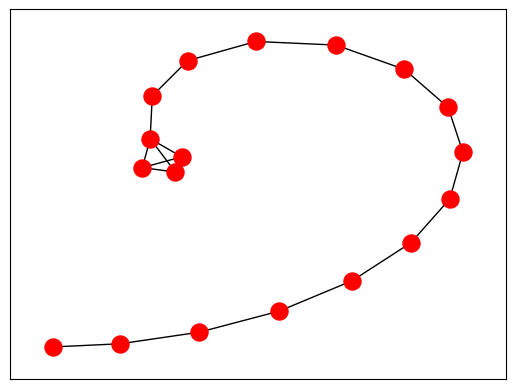

In [3]:
num_node_features=1
count1=0
totalnode=0
for numdata in range(500):
  range1=random.randint(2,6)
  range2=random.randint(10,19)
  m=[i for i in range(range1)]
  n=[i for i in range(range1,range2)]
  Cycle = nx.lollipop_graph(m,n)
  num_nodes=nx.number_of_nodes(Cycle)
  totalnode+=num_nodes

  y=np.ones(num_nodes)

  #Cycle.add_nodes_from([i in range(0,100)])
  #p=math.ceil(random.uniform(5,8))








  data=pyg_utils.from_networkx(Cycle)
  count1+=np.count_nonzero(y)

  #print(y)

  data.y=1
  x=torch.ones(num_nodes,1)
  x=x.float()

  #print(deg.shape)

  #x = torch.randint(low=5,high=10,size=(num_nodes, num_node_features), dtype=torch.float32)
  data.x=x
  #dataset.append(data)
nx.draw_networkx(Cycle, node_size=150, node_color='red',with_labels=False)

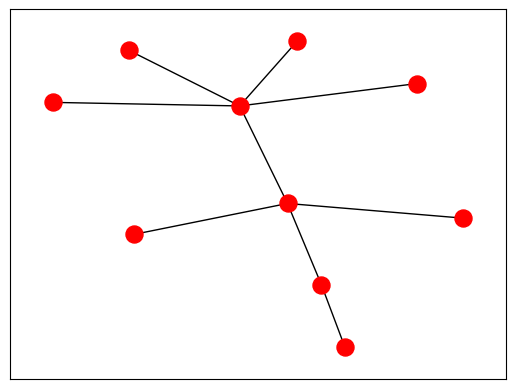

In [4]:
num_node_features=1
count1=0
totalnode=0
for numdata in range(500):
  num_nodes=random.randint(3,13)
  totalnode+=num_nodes

  y=np.ones(num_nodes)

  #Cycle.add_nodes_from([i in range(0,100)])
  p=math.ceil(random.uniform(2,4))
  Cycle = nx.full_rary_tree(p,num_nodes)
  #Cycle=nx.wheel_graph(num_nodes)







  data=pyg_utils.from_networkx(Cycle)
  count1+=np.count_nonzero(y)

  #print(y)

  data.y=0
  x=torch.ones(num_nodes,1)
  x=x.float()

  #print(deg.shape)

  #x = torch.randint(low=5,high=10,size=(num_nodes, num_node_features), dtype=torch.float32)
  data.x=x
  dataset.append(data)
nx.draw_networkx(Cycle, node_size=150, node_color='red',with_labels=False)

In [ ]:
#Load dataset 2 shapes to reproduce our results or generate using the code above

In [6]:
torch.manual_seed(12345)
random.shuffle(dataset)

train_dataset = dataset[:350]
test_dataset = dataset[:]

print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

for step, data in enumerate(train_loader):
    print(f'Step {step + 1}:')
    print('=======')
    print(f'Number of graphs in the current batch: {data.num_graphs}')
    print(data.x)
    print()

Number of training graphs: 350
Number of test graphs: 400
Step 1:
Number of graphs in the current batch: 64
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1

/home/sayan/anaconda3/envs/GraphGen/lib/python3.11/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [7]:
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
from torch_geometric.nn import global_mean_pool


class MLP(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, dropout_rate=0.5):
        super(MLP, self).__init__()
        self.fc1 = torch.nn.Linear(in_channels, hidden_channels)
        self.fc2 = torch.nn.Linear(hidden_channels, out_channels)
        self.dropout = torch.nn.Dropout(dropout_rate)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

class ImprovedGCNWithMLP(torch.nn.Module):
    def __init__(self, hidden_channels, mlp_hidden_channels=64):
        super(ImprovedGCNWithMLP, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(1, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.bn = torch.nn.BatchNorm1d(hidden_channels)
        self.mlp = MLP(hidden_channels, mlp_hidden_channels, 2)
        self.dropout = torch.nn.Dropout(0.5)
        self.leaky_relu = torch.nn.LeakyReLU(0.2)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index)
        x = self.leaky_relu(x)
        x = self.conv2(x, edge_index)
        x = self.leaky_relu(x)
        x = self.conv3(x, edge_index)

        x = global_mean_pool(x, batch)
        x = self.bn(x)
        x = F.dropout(x, p=0.5, training=self.training)
        embedding=x

        # Pass through MLP
        x = self.mlp(x)

        return embedding,x
model = ImprovedGCNWithMLP(hidden_channels=64, mlp_hidden_channels=128)




In [24]:

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

# Add a learning rate scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)

def train():
    model.train()

    for epoch in range(num_epochs):
        for data in train_loader:  # Iterate in batches over the training dataset.
            embedding,  out = model(data.x, data.edge_index, data.batch)  # Perform a single forward pass.
            #print(out)
            loss = criterion(out, data.y)  # Compute the loss.
            loss.backward()  # Derive gradients.
            optimizer.step()  # Update parameters based on gradients.
            optimizer.zero_grad()  # Clear gradients.

        # Update the learning rate scheduler
        scheduler.step()

        # Print the current learning rate every epoch (optional)
        print(f"Epoch {epoch + 1}/{num_epochs}, Learning Rate: {scheduler.get_last_lr()[0]}",loss)
        # train_acc = test(train_loader)
        # test_acc = test(test_loader)
        # print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

# Set the number of epochs
num_epochs = 700

# Call the training loop
train()



Epoch 1/700, Learning Rate: 0.01 tensor(0., grad_fn=<NllLossBackward0>)
Epoch 2/700, Learning Rate: 0.01 tensor(0., grad_fn=<NllLossBackward0>)
Epoch 3/700, Learning Rate: 0.01 tensor(0., grad_fn=<NllLossBackward0>)
Epoch 4/700, Learning Rate: 0.01 tensor(0., grad_fn=<NllLossBackward0>)
Epoch 5/700, Learning Rate: 0.01 tensor(0., grad_fn=<NllLossBackward0>)
Epoch 6/700, Learning Rate: 0.01 tensor(0., grad_fn=<NllLossBackward0>)
Epoch 7/700, Learning Rate: 0.01 tensor(0., grad_fn=<NllLossBackward0>)
Epoch 8/700, Learning Rate: 0.01 tensor(0., grad_fn=<NllLossBackward0>)
Epoch 9/700, Learning Rate: 0.01 tensor(0., grad_fn=<NllLossBackward0>)
Epoch 10/700, Learning Rate: 0.01 tensor(0., grad_fn=<NllLossBackward0>)
Epoch 11/700, Learning Rate: 0.01 tensor(0., grad_fn=<NllLossBackward0>)
Epoch 12/700, Learning Rate: 0.01 tensor(0., grad_fn=<NllLossBackward0>)
Epoch 13/700, Learning Rate: 0.01 tensor(0., grad_fn=<NllLossBackward0>)
Epoch 14/700, Learning Rate: 0.01 tensor(0., grad_fn=<NllLos

In [8]:
# Load model  2shapes.pth to reproduce our results
load_path = ''



# Initialize the model architecture

# Load the saved model weights
model.load_state_dict(torch.load(load_path))

# Set the model to evaluation mode
model.eval()


ImprovedGCNWithMLP(
  (conv1): GCNConv(1, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (bn): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (mlp): MLP(
    (fc1): Linear(in_features=64, out_features=128, bias=True)
    (fc2): Linear(in_features=128, out_features=2, bias=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (dropout): Dropout(p=0.5, inplace=False)
  (leaky_relu): LeakyReLU(negative_slope=0.2)
)

In [9]:
data1=[]
data2=[]
latent_data1=[]
latent_data2=[]
for i in range(len(dataset)):
    model.eval()
    data=dataset[i]
    embedding , out = model(data.x, data.edge_index, data.batch)
    pred = out.argmax(dim=1)
    if(pred==0):
        data1.append(data)
        latent_data1.append(embedding)
    else:
        data2.append(data)
        latent_data2.append(embedding)

print(len(data1))
print(len(data2))

print(data.batch)

#latent_explanations=[]

200
200
None


In [10]:
from time import time
import logging
import os
import os.path as osp
import numpy as np
import time

import torch
import torch.nn.functional as F
from torch_geometric.datasets import TUDataset
from torch_geometric.data import DataLoader
from torch_geometric.utils import degree
from torch.autograd import Variable

import random
from torch.optim.lr_scheduler import StepLR


from utils import stat_graph, split_class_graphs, align_graphs
from utils import two_graphons_mixup, universal_svd
from graphon_estimator import universal_svd
from models import GIN,GCN
from tensorboardX import SummaryWriter

import argparse
logdir='/home/sayan/g-mixup/logs'
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
formatter = logging.Formatter('%(asctime)s - %(levelname)s: - %(message)s', datefmt='%Y-%m-%d')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tensorboard_writer = SummaryWriter(log_dir=logdir)



def prepare_dataset_x(dataset):
    if dataset[0].x is None:
        max_degree = 0
        degs = []
        for data in dataset:
            degs += [degree(data.edge_index[0], dtype=torch.long)]
            max_degree = max( max_degree, degs[-1].max().item() )
            data.num_nodes = int( torch.max(data.edge_index) ) + 1

        if max_degree < 2000:
            # dataset.transform = T.OneHotDegree(max_degree)

            for data in dataset:
                degs = degree(data.edge_index[0], dtype=torch.long)
                data.x = F.one_hot(degs, num_classes=max_degree+1).to(torch.float)
        else:
            deg = torch.cat(degs, dim=0).to(torch.float)
            mean, std = deg.mean().item(), deg.std().item()
            for data in dataset:
                degs = degree(data.edge_index[0], dtype=torch.long)
                data.x = ( (degs - mean) / std ).view( -1, 1 )
    return dataset



def prepare_dataset_onehot_y(dataset):

    y_set = set()
    for data in dataset:
        y_set.add(int(data.y))
    num_classes = len(y_set)

    for data in dataset:
        data.y = F.one_hot(data.y, num_classes=num_classes).to(torch.float)[0]
    return dataset


def mixup_cross_entropy_loss(input, target, size_average=True):
    """Origin: https://github.com/moskomule/mixup.pytorch
    in PyTorch's cross entropy, targets are expected to be labels
    so to predict probabilities this loss is needed
    suppose q is the target and p is the input
    loss(p, q) = -\sum_i q_i \log p_i
    """
    assert input.size() == target.size()
    assert isinstance(input, Variable) and isinstance(target, Variable)
    loss = - torch.sum(input * target)
    return loss / input.size()[0] if size_average else loss







for graph in dataset:
        graph.y=torch.tensor(graph.y)
        graph.y = graph.y.view(-1)

dataset = prepare_dataset_onehot_y(dataset)
#dataset = prepare_dataset_x( dataset )
num_features = dataset[0].x.shape[1]
num_classes = dataset[0].y.shape[0] 

print("Num features",num_features)
print("num_classes",num_classes)


Num features 1
num_classes 2


[0. 1.]
[1. 0.]


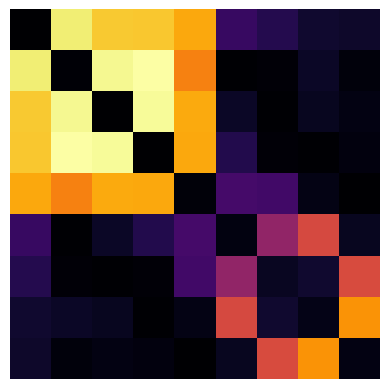

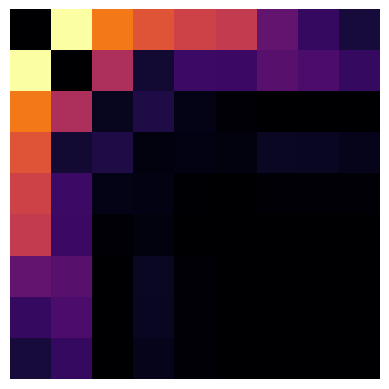

In [11]:


#explain_loader= DataLoader(dataset2[:30], batch_size=1, shuffle=True)
newdataset=dataset

classgraphs=split_class_graphs(newdataset)

avg_num_nodes, avg_num_edges, avg_density, median_num_nodes, median_num_edges, median_density = stat_graph(newdataset)
resolution = int(median_num_nodes)
#print("resolution is",resolution)
graphons=[]
for label,graphs in classgraphs:
    #print("Label is",label)
    #print("graph is",graphs[0])
    align_graphs_list, normalized_node_degrees, max_num, min_num = align_graphs(
                    graphs, padding=True, N=resolution)
    #print("Aligned adj",align_graphs_list[8].shape,align_graphs_list[56].shape)
    graphon = universal_svd(align_graphs_list, threshold=0.2)
    #print("Graphon is ",graphon.shape)

    graphons.append((label, graphon))
#two_graphons = random.sample(graphons, 2)
two_graphons= [graphons[0] , graphons[1]]

plt.figure(1)
print(graphons[0][0])
plt.axis('off')
plt.imshow(graphons[0][1],cmap="inferno")
plt.figure(2)
print(graphons[1][0])
plt.axis('off')
plt.imshow(graphons[1][1],cmap='inferno')



# print(new_graph)
# print(ng)


Label of new graph is tensor(0)
tensor([[0.9853, 0.0147]], grad_fn=<SoftmaxBackward0>)
tensor(0.9853, grad_fn=<SelectBackward0>)
tensor([[0.0157, 0.9843]], grad_fn=<SoftmaxBackward0>)
tensor(0.0157, grad_fn=<SelectBackward0>)
tensor([[1.0000e+00, 2.4372e-10]], grad_fn=<SoftmaxBackward0>)
tensor(1., grad_fn=<SelectBackward0>)
Label of new graph is tensor([0.5500, 0.4500])


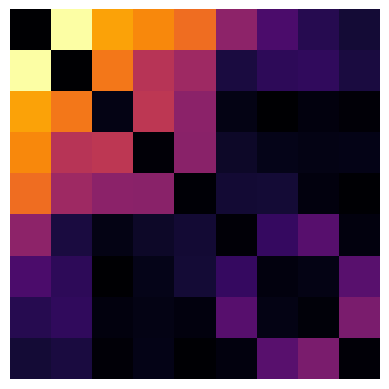

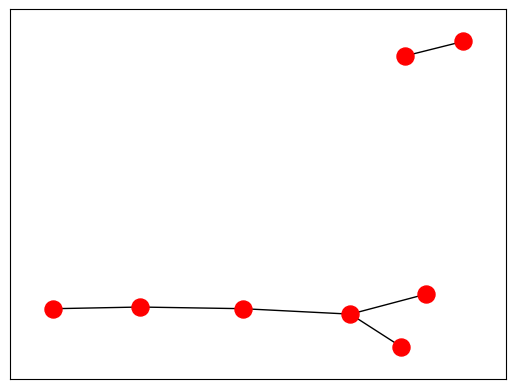

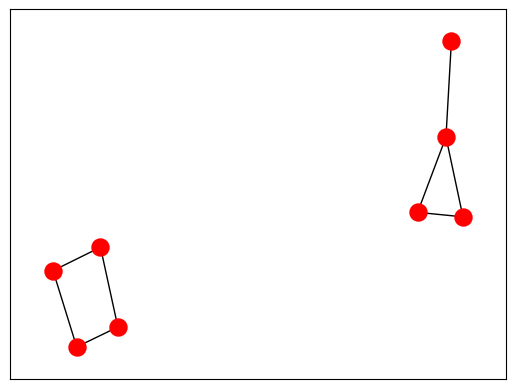

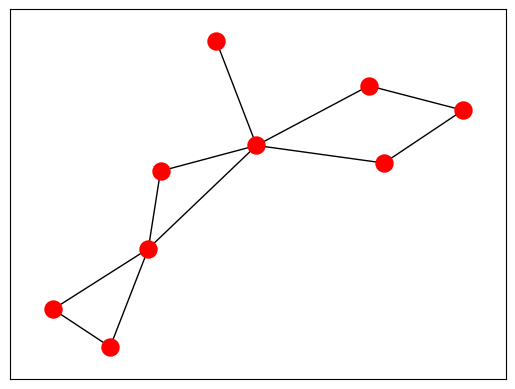

In [46]:
new_graph = two_graphons_mixup(two_graphons, la=0.45, num_sample=3,show=True)
print("Label of new graph is",torch.argmax(new_graph[1].y,dim=-1))
label=torch.argmax(new_graph[1].y,dim=-1)
from torch_geometric.utils import to_networkx
count=4
for data in new_graph:
    num_nodes = int( torch.max(data.edge_index) ) + 1
    data.x= torch.ones(num_nodes,1)
    embedding,out=model(data.x,data.edge_index,data.batch)
    soft=torch.nn.Softmax(dim=1)
    problities=soft(out)
    print(problities)
    print(problities[0][label])
    examplegraph=to_networkx(data,to_undirected=True)
    plt.figure(count+1)
    nx.draw_networkx(examplegraph, node_size=150, node_color='red',with_labels=False)
    count+=1    
print("Label of new graph is",new_graph[1].y)



# ng=two_graphons_mixup(two_graphons,la=1.0,num_sample=1)

In [20]:
la= 0.3
accuracybound=[]
stdbound=[]
lalist=[]
while(la<=0.7):
    ratio= la/(1-la)

    
    boundary_graph = two_graphons_mixup(two_graphons, la=la, num_sample=100)
    #print("Label of new graph is",torch.argmax(new_graph[1].y,dim=-1))
    label=torch.argmax(boundary_graph[1].y,dim=-1)
    print(label)
    #from torch_geometric.utils import to_networkx
    min=1
    boundaryaccuracy=[]
    for numexp in range(10):
        for data in boundary_graph:
            num_nodes = int( torch.max(data.edge_index) ) + 1
            data.x= torch.ones(num_nodes,1)
            embedding,out=model(data.x,data.edge_index,data.batch)
            soft=torch.nn.Softmax(dim=1)
            problities=soft(out)
            if( abs(problities[0][0]-0.5)<min):
                #print("if")
                min= abs(problities[0][label]-0.5)
                boundaryprobs = problities[0][label]
        boundaryaccuracy.append(boundaryprobs)
    boundaryaccuracy=torch.stack(boundaryaccuracy)
    accuracybound.append(boundaryaccuracy.mean(dim=0))
    stdbound.append(boundaryaccuracy.std(dim=0))
    lalist.append(la)
    la=la+0.05
    

    
        
        
  
    #print("Label of new graph is",new_graph[1].y)



# ng=two_graphons_mixup(two_graphons,la=1.0,num_sample=1)

tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(1)
tensor(1)
tensor(1)


Sensitivity Analysis on Accuracy by varying the number of nodes in the generated explanations

In [39]:
#explain_loader= DataLoader(dataset2[:30], batch_size=1, shuffle=True)
newdataset=dataset

classgraphs=split_class_graphs(newdataset)
avg_num_nodes, avg_num_edges, avg_density, median_num_nodes, median_num_edges, median_density = stat_graph(newdataset)
resolution = int(median_num_nodes)-4 # This parameter controls the number of nodes in the generated explanations
mean_accuracy1=[]
std_accuracy1=[]
mean_accuracy2=[]
std_accuracy2=[]
ExplanationNodes=[]

for i in range(10):

    #print("resolution is",resolution)
    graphons=[]
    for label,graphs in classgraphs:
        #print("Label is",label)
        #print("graph is",graphs[0])
        align_graphs_list, normalized_node_degrees, max_num, min_num = align_graphs(
                        graphs, padding=True, N=resolution)
        #print("Aligned adj",align_graphs_list[8].shape,align_graphs_list[56].shape)
        graphon = universal_svd(align_graphs_list, threshold=0.2)
        #print("Graphon is ",graphon.shape)

        graphons.append((label, graphon))
    #two_graphons = random.sample(graphons, 2)
    two_graphons= [graphons[0] , graphons[1]]
    explainer_graph1 = two_graphons_mixup(two_graphons, la=0.0, num_sample=3)
    explainer_graph2 = two_graphons_mixup(two_graphons,la=1.0, num_sample=3)
    label1=torch.argmax(explainer_graph1[0].y,dim=-1)
    label2=torch.argmax(explainer_graph2[0].y,dim=-1)
    accuracy1=[]
    accuracy2=[]

    #print("Label of new graph is",new_graph[1].y)


    for numexplanations in range(100):
        max1=0
        max2=0
        for data in explainer_graph1:
            num_nodes = int( torch.max(data.edge_index) ) + 1
            data.x= torch.ones(num_nodes,1)
            embedding,out=model(data.x,data.edge_index,data.batch)
            soft=torch.nn.Softmax(dim=1)
            
            problities=soft(out)
            if(max1<problities[0][label1]):
                max1= problities[0][label1]
           
        for data in explainer_graph2:
            num_nodes = int( torch.max(data.edge_index) ) + 1
            data.x= torch.ones(num_nodes,1)
            embedding,out=model(data.x,data.edge_index,data.batch)
            soft=torch.nn.Softmax(dim=1)
            problities=soft(out)
            if (max2<problities[0][label2]):
                max2= problities[0][label2]
        accuracy1.append(max1)
        accuracy2.append(max2)
    accuracy1=torch.stack(accuracy1)
    accuracy2=torch.stack(accuracy2)
    mean1=accuracy1.mean(dim=0)
    mean2=accuracy2.mean(dim=0)
    std1=accuracy1.std(dim=0)
    std2=accuracy2.std(dim=0)
    mean_accuracy1.append(mean1)
    mean_accuracy2.append(mean2)
    std_accuracy1.append(std1)
    std_accuracy2.append(std2)
    ExplanationNodes.append(resolution)
    resolution= resolution+1
                
            

     
    

In [22]:
import matplotlib.pyplot as plt
import numpy as np

def plot_mean_with_error(mean, std, threshold,title=None, ax=None):
    """
    Plot mean with error bars.

    Parameters:
        mean (array_like): Array containing mean values.
        std (array_like): Array containing standard deviation values.
        threshold (array_like): Array containing threshold values.
        label (str): Label for the data.
        color (str): Color of the line.
        numsample (int): Sample number.
        ax (matplotlib.axes.Axes, optional): Axes object to plot on. If not provided, a new figure will be created.
    """
    # Flatten the arrays
    mean=torch.tensor(mean,dtype=torch.float32)
    std=torch.tensor(std,dtype=torch.float32)
    mean = np.array(mean).flatten()
    std = np.array(std).flatten()
    threshold = np.array(threshold).flatten()
    # # Select color automatically
    # colors = plt.cm.tab10(np.linspace(0, 1, 10))
    # color = colors[numsample % 10]  # Cycle through colors

    # Plotting
    if ax is None:
        fig, ax = plt.subplots()
    ax.errorbar(threshold, mean, yerr=std, fmt='-')  # '-' for line

    # Adding labels and title
    ax.set_xlabel('Lambda')
    ax.set_ylabel('Mean Class Score')
    ax.set_title(title)

    # ax.legend(loc='lower right',fontsize='small')  # Show legend
    # ax.grid(True)  # Add grid
# # Create a figure outside the function
# fig, ax = plt.subplots()
# plot_mean_with_error(Mean1,Std1,Threshold,label='class1',numsample=1,ax=ax)
# plot_mean_with_error(Mean2,Std2,Threshold,label='class1',numsample=2,ax=ax)
# plt.show()


In [23]:
plot_mean_with_error(mean_accuracy1,std_accuracy1,ExplanationNodes)
print(label1)

NameError: name 'mean_accuracy1' is not defined

tensor(0)


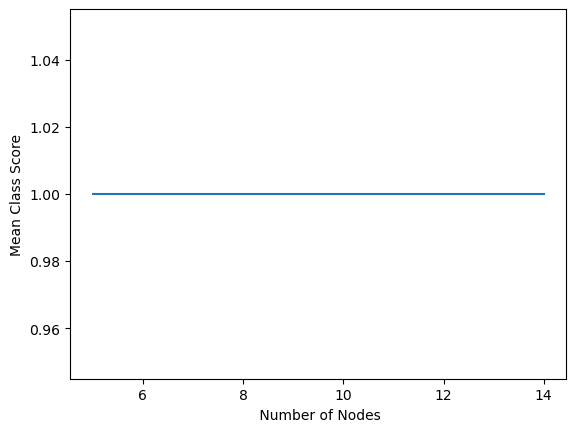

In [42]:
plot_mean_with_error(mean_accuracy2,std_accuracy2,ExplanationNodes)
print(label2)

Sensitivity Analysis by varying the lambda parameter

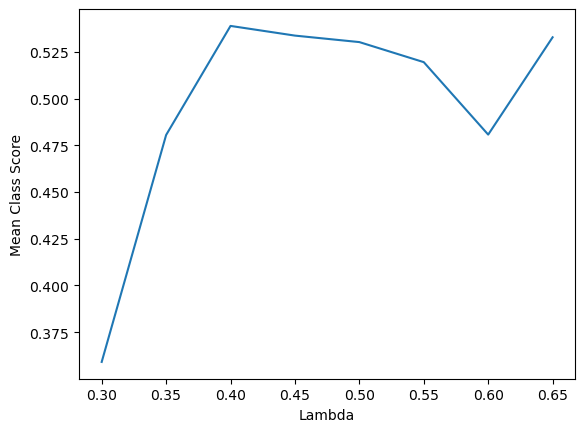

In [24]:
plot_mean_with_error(accuracybound,stdbound,lalist)